ARBOL DE DECISION - TRABAJO FINAL
SIN TIENDA 9001

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor  # Importar modelo de Árbol de Decisión
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# 1. Cargar el dataset
file_path = "C:/Users/Rafael Ugarte/Desktop/Curso Python para Analista de Datos/Clase 1/dataset.txt"  # Especifica la ruta correcta del archivo
df = pd.read_csv(file_path)
df

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52
...,...,...,...,...,...
150145,212638,9984,235.8375,235.8375,38
150146,212639,9984,235.8375,235.8375,30
150147,212642,9984,357.6750,483.7875,31
150148,212643,9984,141.7875,191.6625,12


In [7]:
# 2. Eliminar valores nulos en "Total Price"
df = df.dropna(subset=["Total Price"])
df

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52
...,...,...,...,...,...
150145,212638,9984,235.8375,235.8375,38
150146,212639,9984,235.8375,235.8375,30
150147,212642,9984,357.6750,483.7875,31
150148,212643,9984,141.7875,191.6625,12


In [9]:
# 3. Excluir la tienda 9001 (caso atípico)
df = df[df["Store ID"] != 9001]
df

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52
...,...,...,...,...,...
150145,212638,9984,235.8375,235.8375,38
150146,212639,9984,235.8375,235.8375,30
150147,212642,9984,357.6750,483.7875,31
150148,212643,9984,141.7875,191.6625,12


In [11]:
# 4. Seleccionar variables
X = df[["Total Price"]]  # Variable independiente
y = df["Units Sold"]  # Variable dependiente
print(X)

        Total Price
0           99.0375
1           99.0375
2          133.9500
3          133.9500
4          141.0750
...             ...
150145     235.8375
150146     235.8375
150147     357.6750
150148     141.7875
150149     234.4125

[149889 rows x 1 columns]


In [13]:
# 5. Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# 6. Crear el modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor(random_state=42, max_depth=5)  # max_depth limita la complejidad del árbol

In [17]:
# 7. Entrenar el modelo con los datos de entrenamiento
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [19]:
# 8. Realizar predicciones con los datos de prueba
y_pred_tree = tree_model.predict(X_test)
y_pred_tree

array([41.40320149, 41.40320149, 41.40320149, ..., 41.40320149,
       67.56647023, 41.40320149])

In [21]:
# 9. Evaluar el modelo con métricas de error
mse_tree = mean_squared_error(y_test, y_pred_tree)  # Error cuadrático medio
r2_tree = r2_score(y_test, y_pred_tree)  # Coeficiente de determinación R²

print(f"Error Cuadrático Medio (MSE): {mse_tree:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_tree:.4f}")

Error Cuadrático Medio (MSE): 3135.90
Coeficiente de Determinación (R²): 0.1395


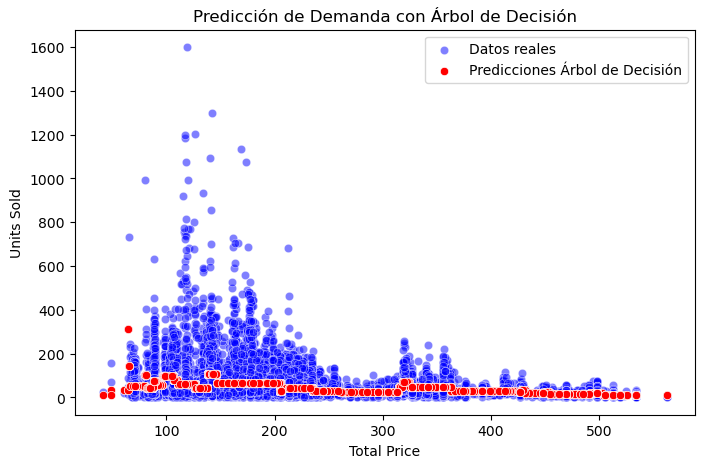

In [23]:
# 10. Visualizar la predicción
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test["Total Price"], y=y_test, label="Datos reales", color="blue", alpha=0.5)
sns.scatterplot(x=X_test["Total Price"], y=y_pred_tree, label="Predicciones Árbol de Decisión", color="red")
plt.xlabel("Total Price")
plt.ylabel("Units Sold")
plt.title("Predicción de Demanda con Árbol de Decisión")
plt.legend()
plt.show()